# LTSM for foot traffic
## setup imports


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import AUC, Accuracy
from tensorflow.keras.layers import Dense, Dropout, LSTM

import datetime as dt

from fbprophet import Prophet


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
CLOSE = 'Close'
ROW_AXIS = 0
COL_AXIS = 1

In [3]:
df = pd.read_csv('/Users/joe.lau/Downloads/bar.csv')
print(df.columns)
company = "BURGER_KING"
df = df[["Date", company]]
# # Creates the datetime object from date
df.columns=["ds", "y"]
df['ds'] = pd.to_datetime(df['ds'])
df.head()




Index(['Date', 'ARBYS', 'BURGER_KING', 'CARLS_JR', 'CHICK_FIL_A',
       'CHIPOTLE_MEXICAN_GRILL', 'DAIRY_QUEEN', 'DUNKIN_DONUTS',
       'FIVE_GUYS_BURGERS_AND_FRIES', 'HARDEES', 'IN_N_OUT_BURGER',
       'JACK_IN_THE_BOX', 'JIMMY_JOHNS', 'KFC', 'MCDONALDS', 'PANERA_BREAD',
       'PEETS_COFFEE_AND_TEA', 'SONIC', 'STARBUCKS', 'SUBWAY', 'TACO_BELL',
       'WENDYS', 'WINGSTOP'],
      dtype='object')


,ds,y
0,2019-02-01,70305.0
1,2019-02-02,63182.0
2,2019-02-03,48316.0
3,2019-02-04,48960.0
4,2019-02-05,58377.0


In [4]:
m = Prophet()
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
# place holder for future predictions
days_to_predict = 365
future = m.make_future_dataframe(periods=days_to_predict)

forcast = m.predict(future)

In [21]:
forcast[["ds", "yhat_lower", "yhat_upper", "yhat"]].tail(7)

,ds,yhat_lower,yhat_upper,yhat
822,2021-05-03,6696.455031,61960.222335,34165.809378
823,2021-05-04,6494.085674,58412.916547,33422.716754
824,2021-05-05,9423.393554,61353.850928,35413.009875
825,2021-05-06,7305.002974,60226.199431,34930.921011
826,2021-05-07,17312.587755,69750.053697,43359.348081
827,2021-05-08,9805.710718,62257.432631,36886.905867
828,2021-05-09,3033.011166,58838.836845,30072.834558


In [28]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
fig = plot_plotly(m, forcast, ylabel=f'{company} visits', xlabel='date')
fig.update_layout(title=f'{company} FB Prophet')
py.plot(fig, filename=f"{company}.html")
fig.show()

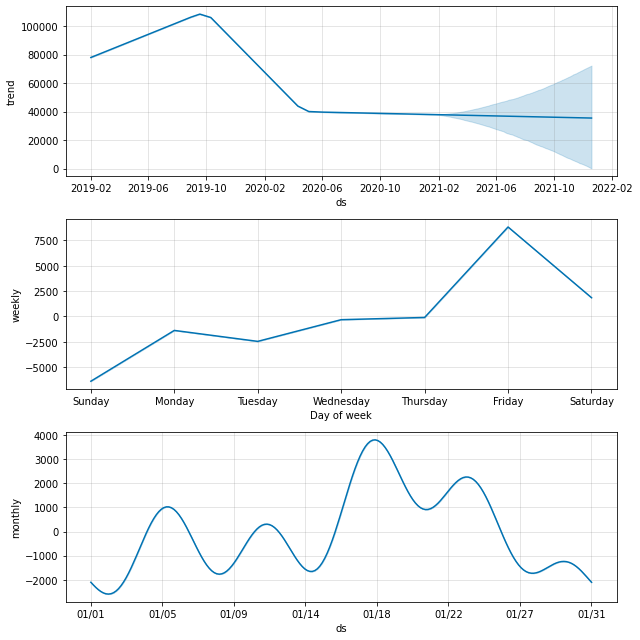

In [29]:
m.plot_components(forcast);

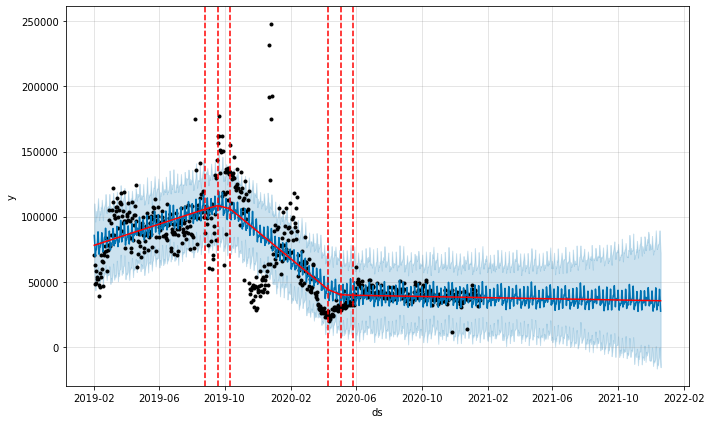

In [30]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forcast)
a = add_changepoints_to_plot(fig.gca(), m, forcast)

## RMSE: how good is it

In [31]:

# se = np.square(forcast.loc[:, 'yhat'][-10:] - df['y'][-10:])
se = np.square(forcast.loc[:, 'yhat'] - df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse_str = "{:0.2f}".format(rmse)
print("rmse: " + rmse_str)

rmse: 20616.77


## RMSE: last 100 days

In [32]:
se = np.square(forcast.loc[:, 'yhat'][-100:] - df['y'][-100:])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse_str = "{:0.2f}".format(rmse)
print("rmse: " + rmse_str)

rmse: nan
